## Working on the python project covid 19

#### Covide - 19 Small Database (downloaded from kaggle)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"D:\Data Science\Python  Module\Covid-19.csv")
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [5]:
data.count()
# Count function give the not-null values count

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

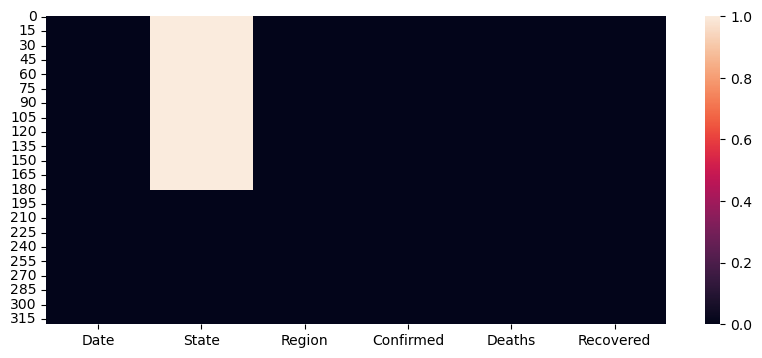

In [8]:
plt.figure(figsize = (10,4))
sns.heatmap(data.isnull())
plt.show()

### Q Show the number of Confirmed, Death and Recoved cases in each region

In [12]:
data.groupby("Region").sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [14]:
data.groupby("Region")[['Confirmed','Deaths','Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [17]:
data.groupby("Region")[['Confirmed','Deaths','Recovered']].sum().sort_values(by=['Confirmed'], ascending = False)

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
...,...,...,...
Sao Tome and Principe,8,0,4
Papua New Guinea,8,0,0
Bhutan,7,0,5


### Q remove all the record where Confirmed are less than 10.

In [18]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [19]:
data.Confirmed <10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [23]:
# the data which having the confirmed cases less than 10.
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [28]:
# Removing the confirmed cases using the ~ (tild) operator
confirmed_data = data[~(data.Confirmed < 10)]
confirmed_data.head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


### Q In Which Region the Maximum number of Confirmed cases were recorded?

In [37]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

In [38]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### Q In Which Region the Minimum number of Death cases were recorded?

In [41]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True)

Region
Laos              0
Mongolia          0
Mozambique        0
Cambodia          0
Fiji              0
              ...  
France        24121
Spain         24275
UK            26166
Italy         27682
US            60967
Name: Deaths, Length: 187, dtype: int64

In [42]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True).head(20)

Region
Laos                        0
Mongolia                    0
Mozambique                  0
Cambodia                    0
Fiji                        0
Namibia                     0
Nepal                       0
Madagascar                  0
Macau                       0
Papua New Guinea            0
Rwanda                      0
Saint Kitts and Nevis       0
Bhutan                      0
Dominica                    0
Central African Republic    0
Saint Lucia                 0
Holy See                    0
Sao Tome and Principe       0
Yemen                       0
Western Sahara              0
Name: Deaths, dtype: int64

### Q How many Confiremd, Death and Recoveded cases were reported from india till 29 April 2020?

In [45]:
data[data['Region'] == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Q Sort the entire data with respect to No of Recorded Cases in Asending Order?

In [46]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [49]:
confirmend_sort = data.sort_values(by = 'Confirmed')
confirmend_sort.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0


### ----------------------------------------------------- Thank You ------------------------------------------------------------